In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df2 = sns.load_dataset('penguins')

In [20]:
df2 = df2.dropna()

In [22]:
df2.head(7)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male


In [2]:
df = pd.read_csv('subfolder/titanic.csv')
df.info()
print('_'*40)
df.head(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB
________________________________________


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"


In [3]:
tbd = ['cabin', 'boat', 'body', 'home.dest']
df = df.drop(tbd, axis = 1)
df['embarked'] = df.embarked.fillna('S')

Working with the age column

In [4]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
df['age'] = df.age.fillna(df.age.median())
df['age_bin'] = pd.cut(df.age, bins, right=True, include_lowest= False)

#Making sure there is no 0 age
df['age'] = df.age.replace(0, np.NaN)

df = df.dropna()


Creating a seperate dataframe for those that survived

In [5]:
surv = df[df['survived']==1]

In [8]:
df.info()
print('_'*40)
surv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1308 non-null   float64 
 1   survived  1308 non-null   float64 
 2   name      1308 non-null   object  
 3   sex       1308 non-null   object  
 4   age       1308 non-null   float64 
 5   sibsp     1308 non-null   float64 
 6   parch     1308 non-null   float64 
 7   ticket    1308 non-null   object  
 8   fare      1308 non-null   float64 
 9   embarked  1308 non-null   object  
 10  age_bin   1308 non-null   category
dtypes: category(1), float64(6), object(4)
memory usage: 114.1+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 1300
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    500 non-null    float64 
 1   survived  500 non-null    float64 

In [47]:
pie_list = []
labels = ['Male', 'Female']
male = 0
female = 0
for i in df.sex:
    if i == 'male':
        male += 1
    else:
        female += 1


pie_list.append(male)
pie_list.append(female)
pie_list

    

[842, 466]

Creating Visualizations

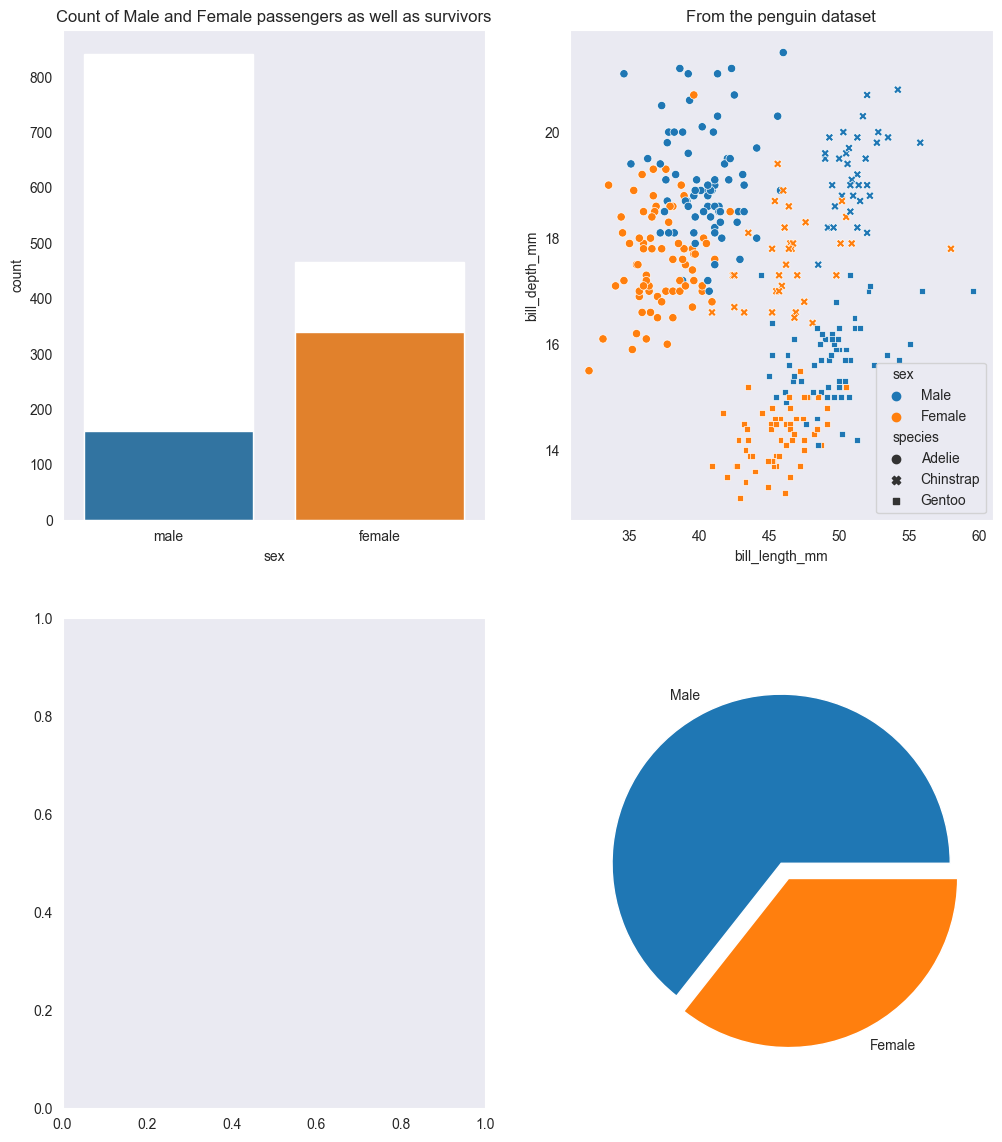

In [50]:
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2,2, figsize = (12,14))

sns.set_style('dark')

sns.countplot(x = 'sex', data=df, order = ['male', 'female'], color = 'white', ax=ax1)
sns.countplot(x = 'sex', data = surv,order = ['male', 'female'], ax=ax1 )
ax1.set_title('Count of Male and Female passengers as well as survivors')

# From the penguin dataset 
ax2.set_title('From the penguin dataset')
sns.scatterplot(x ='bill_length_mm', y = 'bill_depth_mm', data = df2, ax = ax2, hue = 'sex', style='species')

plt.pie(pie_list, labels = labels, explode=(0, 0.1))
plt.show()